In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
lending_data = pd.read_csv("Resources/lending_data.csv")
# Review the DataFrame
# YOUR CODE HERE!
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = lending_data['loan_status']
# Separate the X variable, the features
# YOUR CODE HERE!
X = lending_data.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
# YOUR CODE HERE!
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
logistic_regression_model = LogisticRegression(random_state=1)
# Fit the model using training data
# YOUR CODE HERE!
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
# YOUR CODE HERE!
training_predictions = lr_model.predict(X_train)
testing_predictions = logistic_regression_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
from sklearn.metrics import confusion_matrix
training_matrix = confusion_matrix(y_train, training_predictions)
test_matrix = confusion_matrix(y_test, testing_predictions)
print(training_matrix)
print(test_matrix)

[[59730   305]
 [  194  1799]]
[[14926    75]
 [   46   461]]


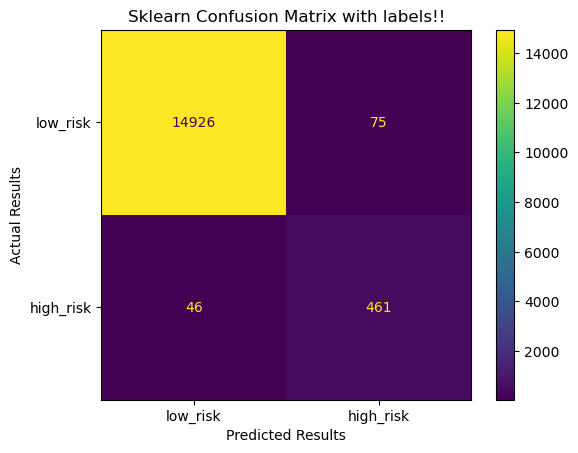

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, testing_predictions)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['low_risk', 'high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

In [11]:
# Print the classification report for the model
# YOUR CODE HERE!
training_report = classification_report(y_train, training_predictions)
testing_report = classification_report(y_test, testing_predictions)
print(training_report)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     60035
           1       0.86      0.90      0.88      1993

    accuracy                           0.99     62028
   macro avg       0.93      0.95      0.94     62028
weighted avg       0.99      0.99      0.99     62028

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

The provided classification report evaluates the performance of a logistic regression model on both training and testing sets for predicting healthy (0) and high-risk (1) loans. The model demonstrates excellent accuracy, precision, and recall for the healthy loans (class 0), with precision and recall both at 1.00. However, for high-risk loans (class 1), the precision is slightly lower at 0.86, indicating some false positives, but the recall remains high at 0.91, indicating effective identification of actual high-risk loans. Overall, the logistic regression model performs impressively, achieving high accuracy, precision, and recall for both classes, suggesting its effectiveness in distinguishing between healthy and high-risk loans.

---